## Introduce the Data

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [24]:
df = pd.read_csv('/content/drive/MyDrive/AI_LAB_Final/Wine Dataset.csv')

In [25]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


##3. Data Preprocessing



###a)Data Cleaning

### Correct data types

In [26]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [27]:
df['type'] = [0 if x == 'white' else 1 for x in df['type']]

In [28]:
df.type

,type
0,0
1,0
2,0
3,0
4,0
...,...
6492,1
6493,1
6494,1
6495,1


### Handle missing values



In [29]:
df.isnull().sum().sort_values(ascending=False).head()

,0
fixed acidity,10
pH,9
volatile acidity,8
sulphates,4
citric acid,3


In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

imputer.fit(df)
df = pd.DataFrame(data=imputer.transform(df) , columns=df.columns)

In [31]:
df.isnull().sum().sort_values(ascending=False).head()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0


### Remove duplicate rows

In [32]:
print(f"Number of duplicate rows before removal: {df.duplicated().sum()}")
display(df[df.duplicated()])

Number of duplicate rows before removal: 1168


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,0.0,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
5,0.0,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
7,0.0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
8,0.0,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
39,0.0,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.6,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,1.0,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0
6462,1.0,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0
6465,1.0,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0
6479,1.0,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5.0


In [33]:
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows after removal: 0


##b)Encoding

### Label Encoding for binary categorical features



The 'type' column has already been label encoded. It was converted to 0s and 1s, and its data type is already an integer. So, this step is complete.

##One-Hot Encoding for multi-class categorical features

After reviewing the current data types in the DataFrame, it appears there are no remaining multi-class categorical features that require one-hot encoding. All columns are already numerical (either integer or float).



##c)Feature Scaling

### StandardScaler

In [34]:
# Separate features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for easier viewing and further processing
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("First 5 rows of scaled features (X):")
display(X_scaled_df.head())

First 5 rows of scaled features (X):


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.585079,-0.164028,-0.440466,0.280609,3.474846,-0.316677,0.838662,0.982996,2.179883,-1.401461,-0.556280,-1.474288
1,-0.585079,-0.695190,-0.262000,0.144611,-0.766852,-0.208083,-0.901550,0.313700,-0.180714,0.472068,-0.288999,-0.884080
2,-0.585079,0.670656,-0.380978,0.552604,0.410164,-0.180935,-0.003376,-0.302757,0.190237,0.222264,-0.623100,-0.378187
3,-0.585079,-0.012267,-0.678421,0.008613,0.765489,0.036252,0.950934,1.264804,0.358851,-0.214893,-0.890382,-0.546818
4,-0.585079,-0.771070,-0.143023,-1.079369,0.432372,-0.316677,-0.003376,0.384152,0.122791,-0.277344,-0.422639,-0.799765


## d)Train-Test Split

### • Train: 80% • Test: 20


In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4263, 12)
Shape of X_test: (1066, 12)
Shape of y_train: (4263,)
Shape of y_test: (1066,)


##4. Apply Five Machine Learning Algorithms

### (I) Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.5713

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         8
         4.0       0.50      0.02      0.04        45
         5.0       0.64      0.62      0.63       359
         6.0       0.54      0.74      0.62       455
         7.0       0.55      0.29      0.38       175
         8.0       0.00      0.00      0.00        23
         9.0       0.00      0.00      0.00         1

    accuracy                           0.57      1066
   macro avg       0.32      0.24      0.24      1066
weighted avg       0.56      0.57      0.54      1066



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix

In [38]:
print(confusion_matrix(y_test, y_pred_lr))

[[  0   1   3   2   1   1   0]
 [  0   1  21  23   0   0   0]
 [  0   0 223 134   2   0   0]
 [  0   0  89 335  30   1   0]
 [  0   0  10 115  50   0   0]
 [  0   0   1  15   7   0   0]
 [  0   0   0   0   1   0   0]]


### Confusion Matrix for Logistic Regression

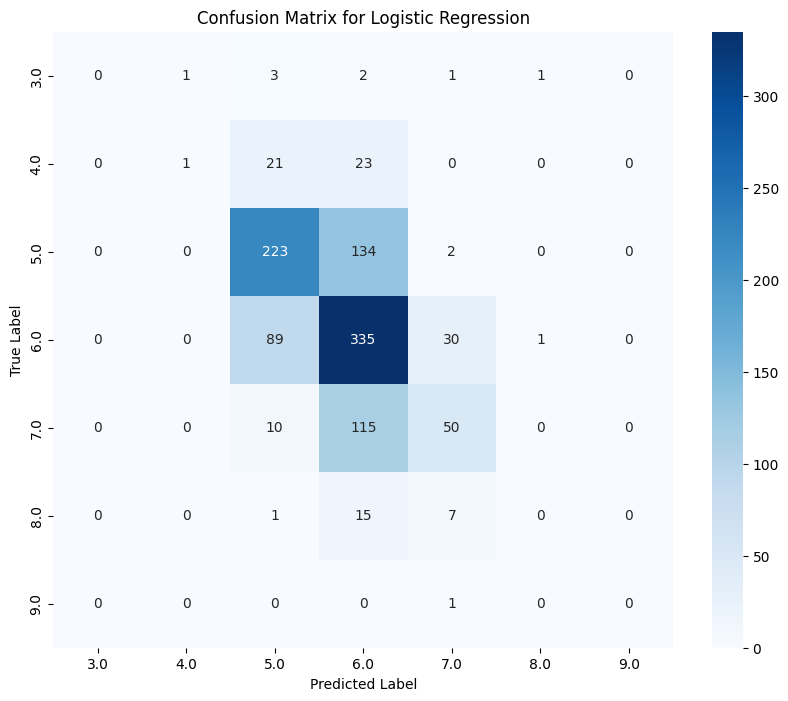

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Get unique classes present in y_test and y_pred_lr to label the matrix
classes = sorted(list(set(y_test).union(set(y_pred_lr))))

plt.figure(figsize=(10, 8))
sns.heatmap(cm_lr, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### (II) K-Nearest Neighbors (KNN) Model

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN model
# A common practice is to start with an odd number for n_neighbors to avoid ties
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print(f"K-Nearest Neighbors Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 0.5244

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         8
         4.0       0.39      0.16      0.22        45
         5.0       0.56      0.62      0.59       359
         6.0       0.53      0.60      0.56       455
         7.0       0.42      0.33      0.37       175
         8.0       0.00      0.00      0.00        23
         9.0       0.00      0.00      0.00         1

    accuracy                           0.52      1066
   macro avg       0.27      0.24      0.25      1066
weighted avg       0.50      0.52      0.51      1066



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Confusion Matrix for K-Nearest Neighbors (KNN)

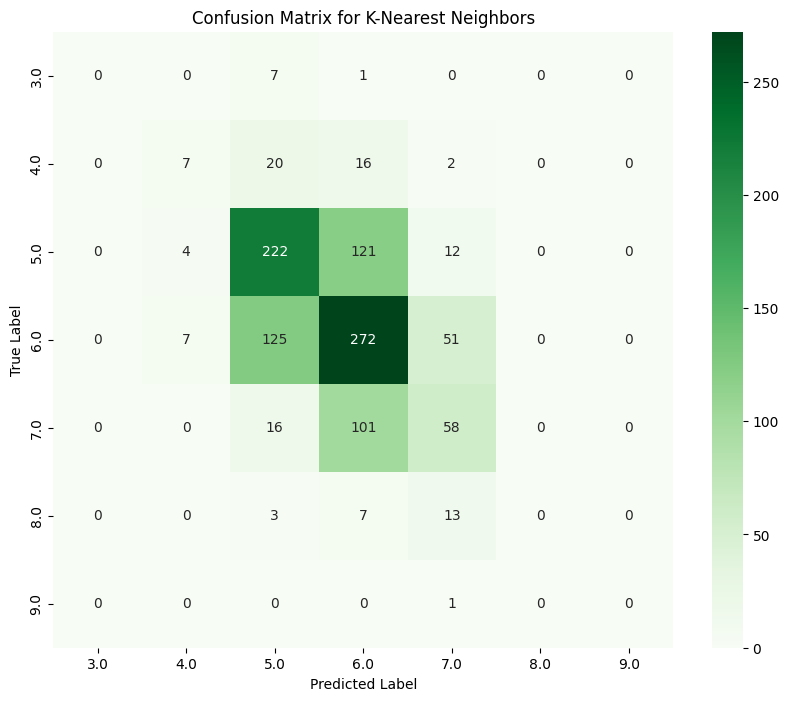

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Get unique classes present in y_test and y_pred_knn to label the matrix
classes_knn = sorted(list(set(y_test).union(set(y_pred_knn))))

plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='Greens', xticklabels=classes_knn, yticklabels=classes_knn)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()

### (III) Decision Tree Classifier Model

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print(f"Decision Tree Classifier Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nDecision Tree Classifier Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier Accuracy: 0.4550

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         8
         4.0       0.21      0.20      0.20        45
         5.0       0.54      0.52      0.53       359
         6.0       0.48      0.50      0.49       455
         7.0       0.37      0.33      0.34       175
         8.0       0.13      0.22      0.16        23
         9.0       0.00      0.00      0.00         1

    accuracy                           0.45      1066
   macro avg       0.25      0.25      0.25      1066
weighted avg       0.46      0.45      0.46      1066



### Confusion Matrix for Decision Tree Classifier

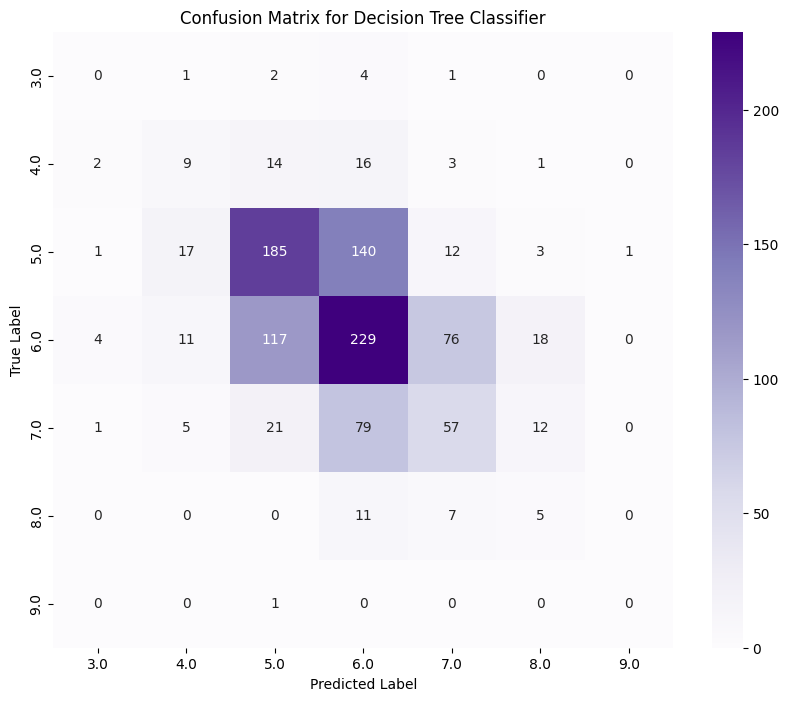

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for Decision Tree Classifier
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Get unique classes present in y_test and y_pred_dt to label the matrix
classes_dt = sorted(list(set(y_test).union(set(y_pred_dt))))

plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt='g', cmap='Purples', xticklabels=classes_dt, yticklabels=classes_dt)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### ROC Curve for Logistic Regression

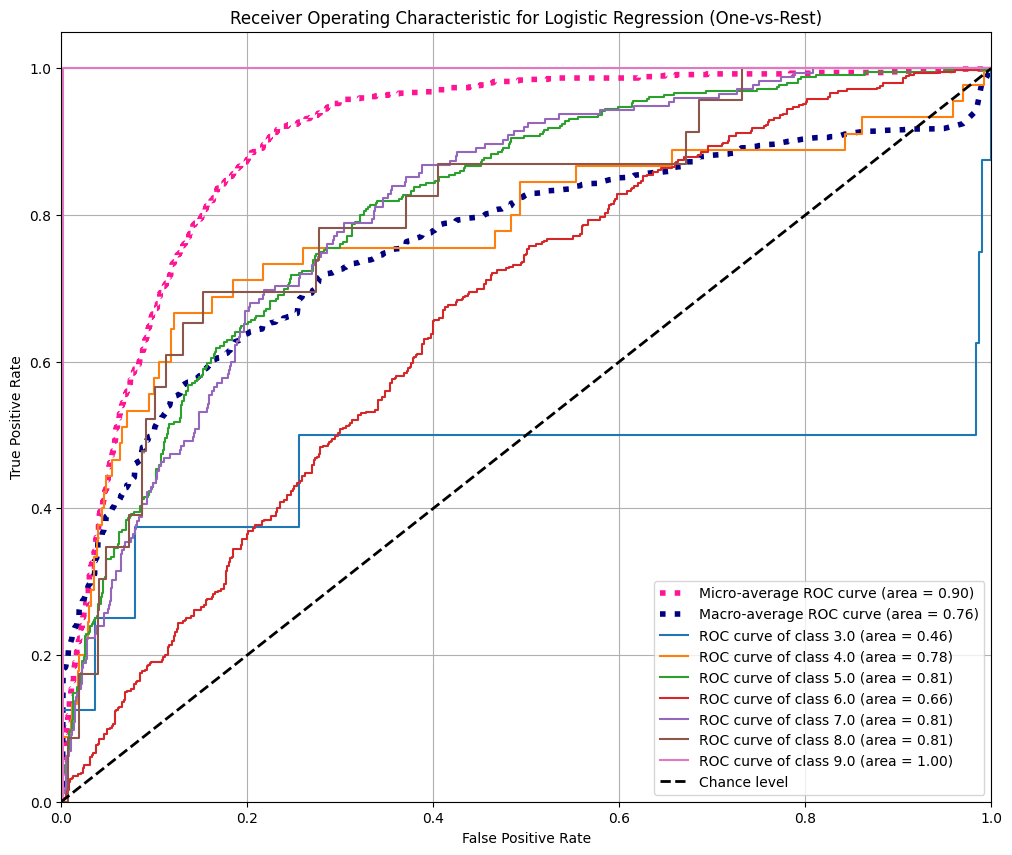

In [44]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

# Binarize y_test for multi-class ROC curve
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_test_binarized = encoder.fit_transform(y_test.values.reshape(-1, 1))

# Get predicted probabilities from Logistic Regression model
y_pred_proba_lr = lr_model.predict_proba(X_test)

# Calculate ROC curve and AUC for each class (one-vs-rest)
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_lr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba_lr.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and AUC
# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {encoder.categories_[0][i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Chance level')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Learning Curve for Logistic Regression

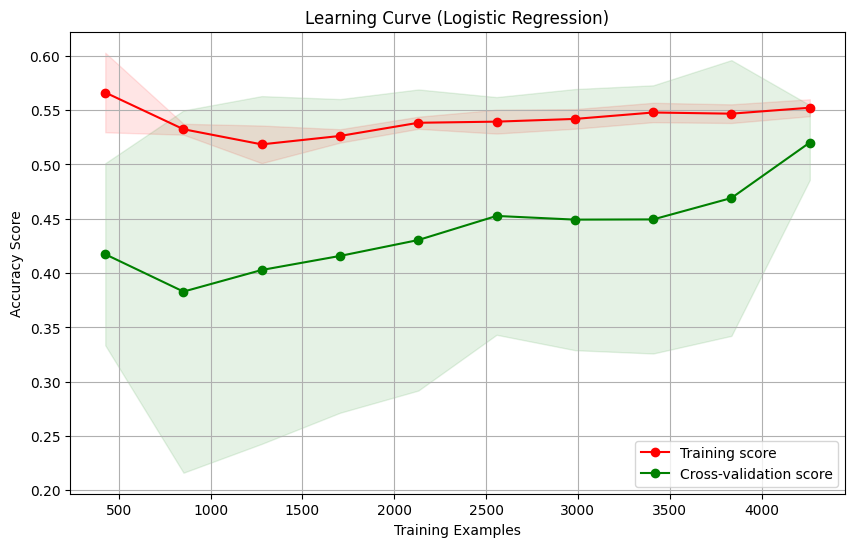

In [45]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    lr_model, X_scaled_df, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

### (IV) Random Forest Classifier Model

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(f"Random Forest Classifier Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nRandom Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.5694

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         8
         4.0       0.50      0.02      0.04        45
         5.0       0.63      0.62      0.63       359
         6.0       0.54      0.71      0.61       455
         7.0       0.54      0.34      0.42       175
         8.0       0.25      0.04      0.07        23
         9.0       0.00      0.00      0.00         1

    accuracy                           0.57      1066
   macro avg       0.35      0.25      0.25      1066
weighted avg       0.56      0.57      0.54      1066



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Confusion Matrix for Random Forest Classifier

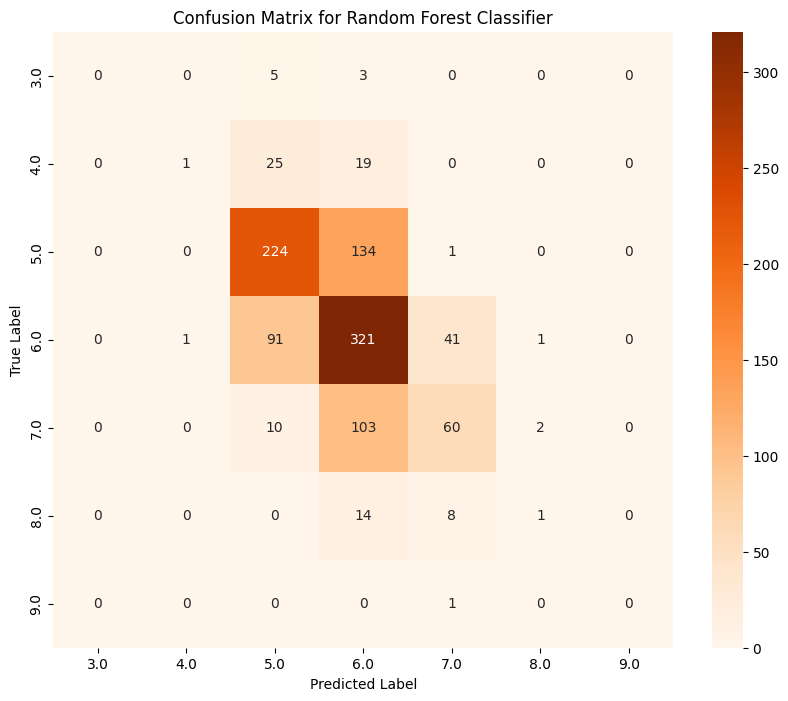

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for Random Forest Classifier
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Get unique classes present in y_test and y_pred_rf to label the matrix
classes_rf = sorted(list(set(y_test).union(set(y_pred_rf))))

plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Oranges', xticklabels=classes_rf, yticklabels=classes_rf)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

### Learning Curve for Random Forest Classifier

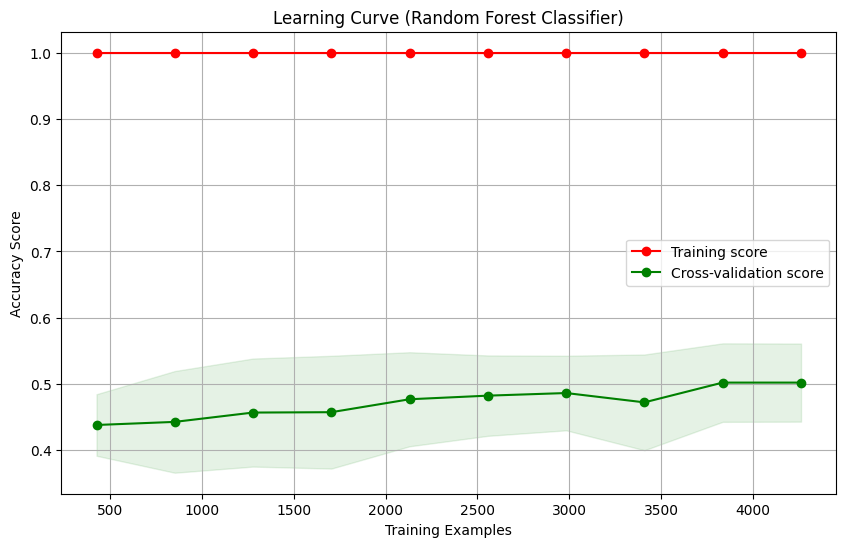

In [48]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Calculate learning curves for Random Forest model
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    rf_model, X_scaled_df, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
train_scores_std_rf = np.std(train_scores_rf, axis=1)
test_scores_mean_rf = np.mean(test_scores_rf, axis=1)
test_scores_std_rf = np.std(test_scores_rf, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Random Forest Classifier)")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.grid()

plt.fill_between(train_sizes_rf, train_scores_mean_rf - train_scores_std_rf,
                 train_scores_mean_rf + train_scores_std_rf, alpha=0.1, color="r")
plt.fill_between(train_sizes_rf, test_scores_mean_rf - test_scores_std_rf,
                 test_scores_mean_rf + test_scores_std_rf, alpha=0.1, color="g")
plt.plot(train_sizes_rf, train_scores_mean_rf, 'o-', color="r", label="Training score")
plt.plot(train_sizes_rf, test_scores_mean_rf, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

### (V) Support Vector Machine (SVM) Model

In [49]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the LinearSVC model
# Set max_iter for convergence and dual=False for a large number of samples
# Since the target is multi-class, it uses a one-vs-rest strategy by default
svm_model = LinearSVC(max_iter=10000, random_state=42, dual=False)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print(f"Support Vector Machine Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.5516

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00        45
         5.0       0.63      0.64      0.63       359
         6.0       0.51      0.78      0.62       455
         7.0       0.44      0.02      0.04       175
         8.0       0.00      0.00      0.00        23
         9.0       0.00      0.00      0.00         1

    accuracy                           0.55      1066
   macro avg       0.23      0.21      0.19      1066
weighted avg       0.50      0.55      0.48      1066



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Confusion Matrix for Support Vector Machine (SVM)

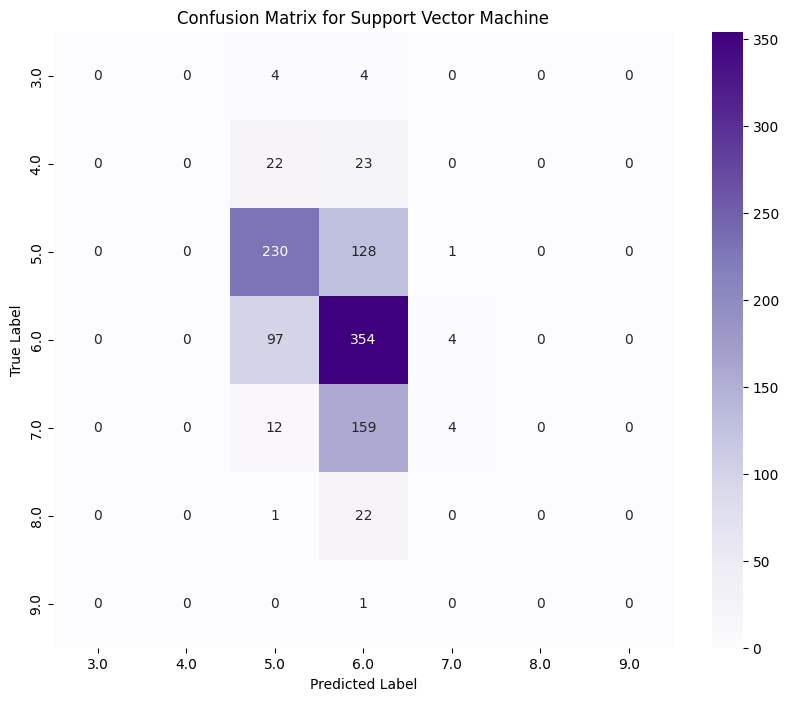

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Get unique classes present in y_test and y_pred_svm to label the matrix
classes_svm = sorted(list(set(y_test).union(set(y_pred_svm))))

plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='Purples', xticklabels=classes_svm, yticklabels=classes_svm)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

### Learning Curve for Support Vector Machine (SVM)

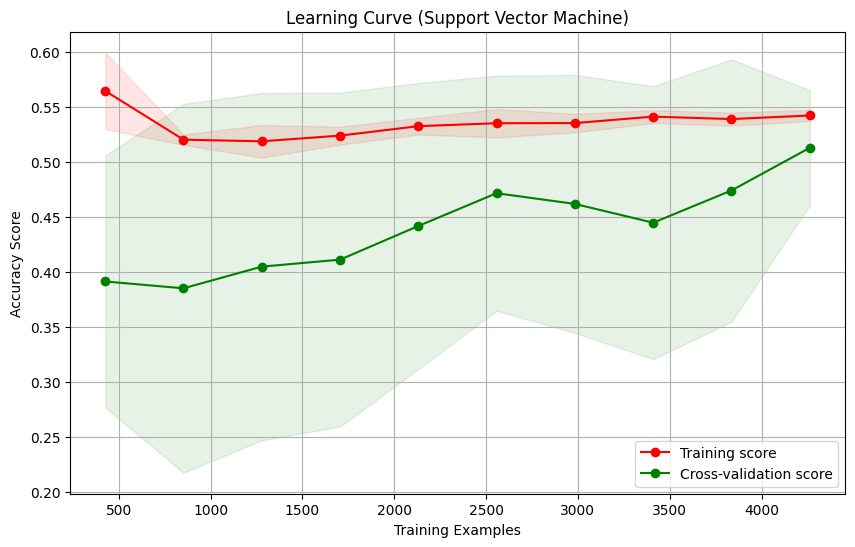

In [51]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Calculate learning curves for SVM model
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(
    svm_model, X_scaled_df, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean_svm = np.mean(train_scores_svm, axis=1)
train_scores_std_svm = np.std(train_scores_svm, axis=1)
test_scores_mean_svm = np.mean(test_scores_svm, axis=1)
test_scores_std_svm = np.std(test_scores_svm, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Support Vector Machine)")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.grid()

plt.fill_between(train_sizes_svm, train_scores_mean_svm - train_scores_std_svm,
                 train_scores_mean_svm + train_scores_std_svm, alpha=0.1, color="r")
plt.fill_between(train_sizes_svm, test_scores_mean_svm - test_scores_std_svm,
                 test_scores_mean_svm + test_scores_std_svm, alpha=0.1, color="g")
plt.plot(train_sizes_svm, train_scores_mean_svm, 'o-', color="r", label="Training score")
plt.plot(train_sizes_svm, test_scores_mean_svm, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

##6. Visualization Requirements

### Histograms of Feature Distributions

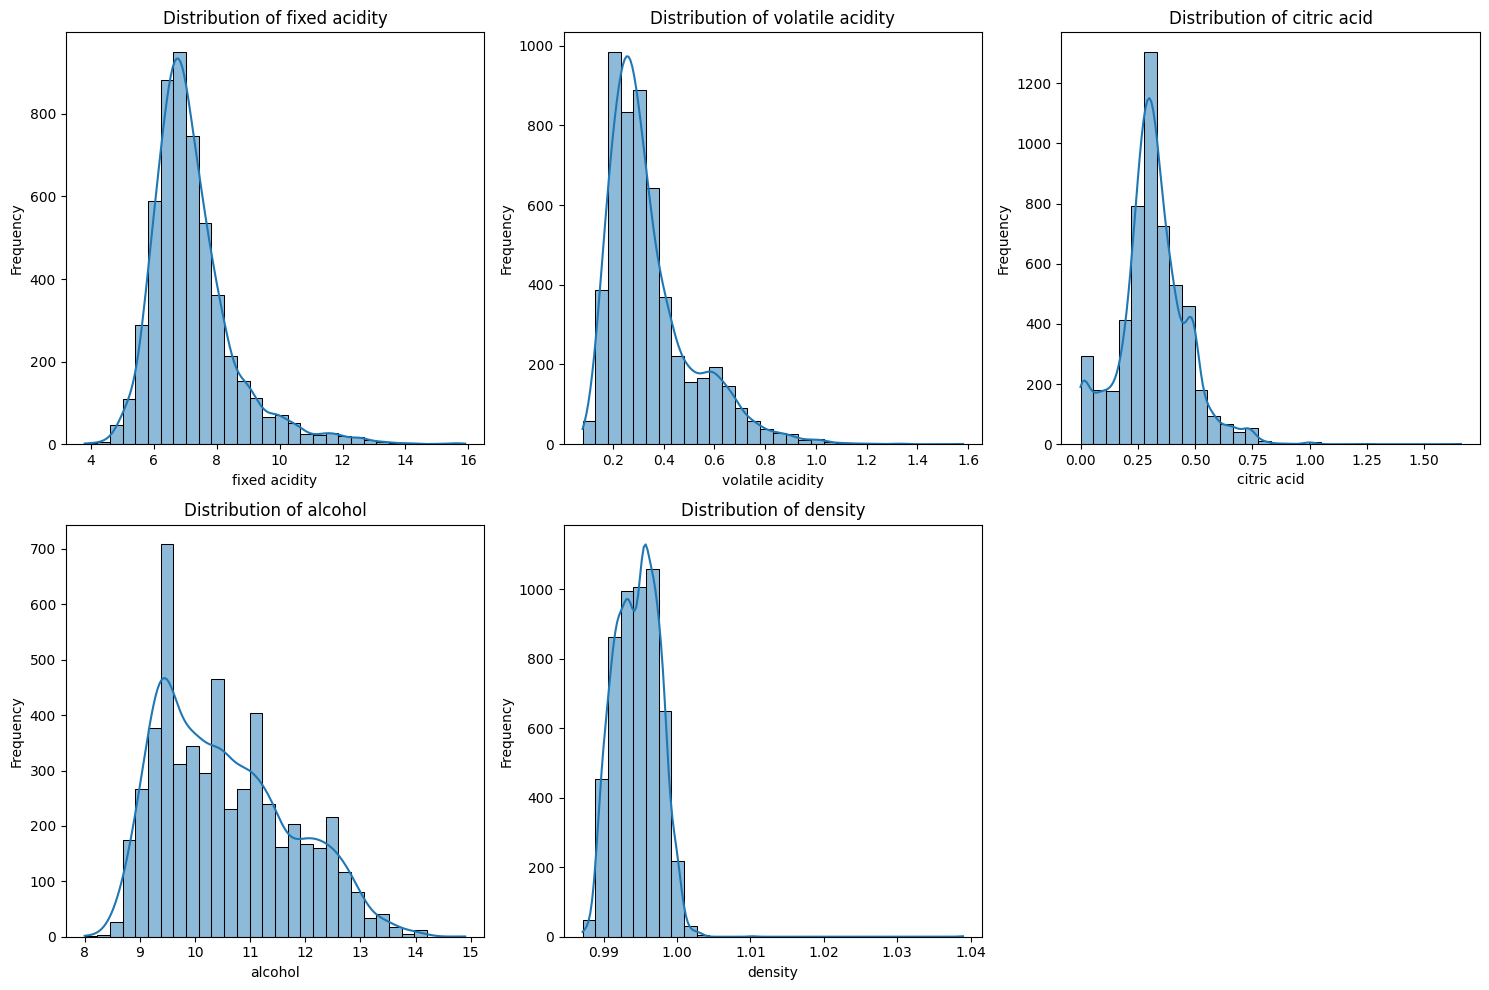

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few key features for visualization
selected_features_hist = ['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'density']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features_hist):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Correlation Heatmap

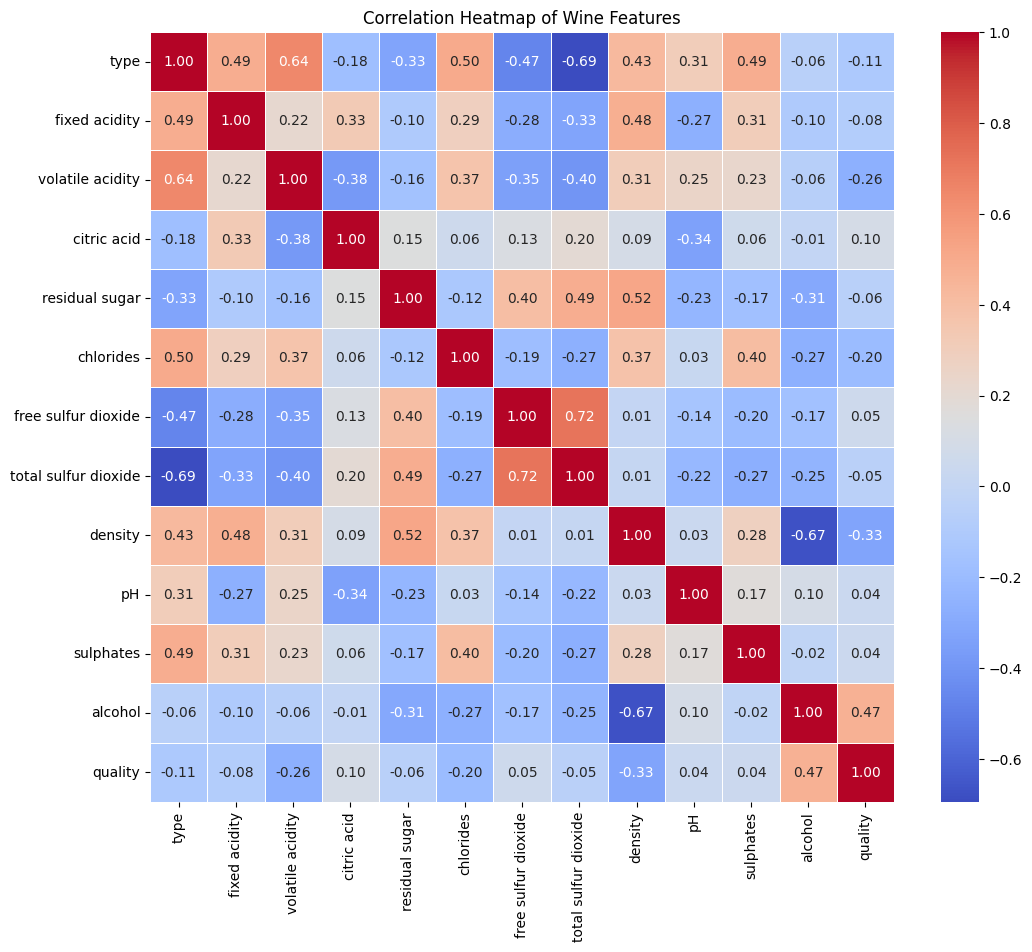

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Wine Features')
plt.show()

### Scatter Plots of Feature Relationships

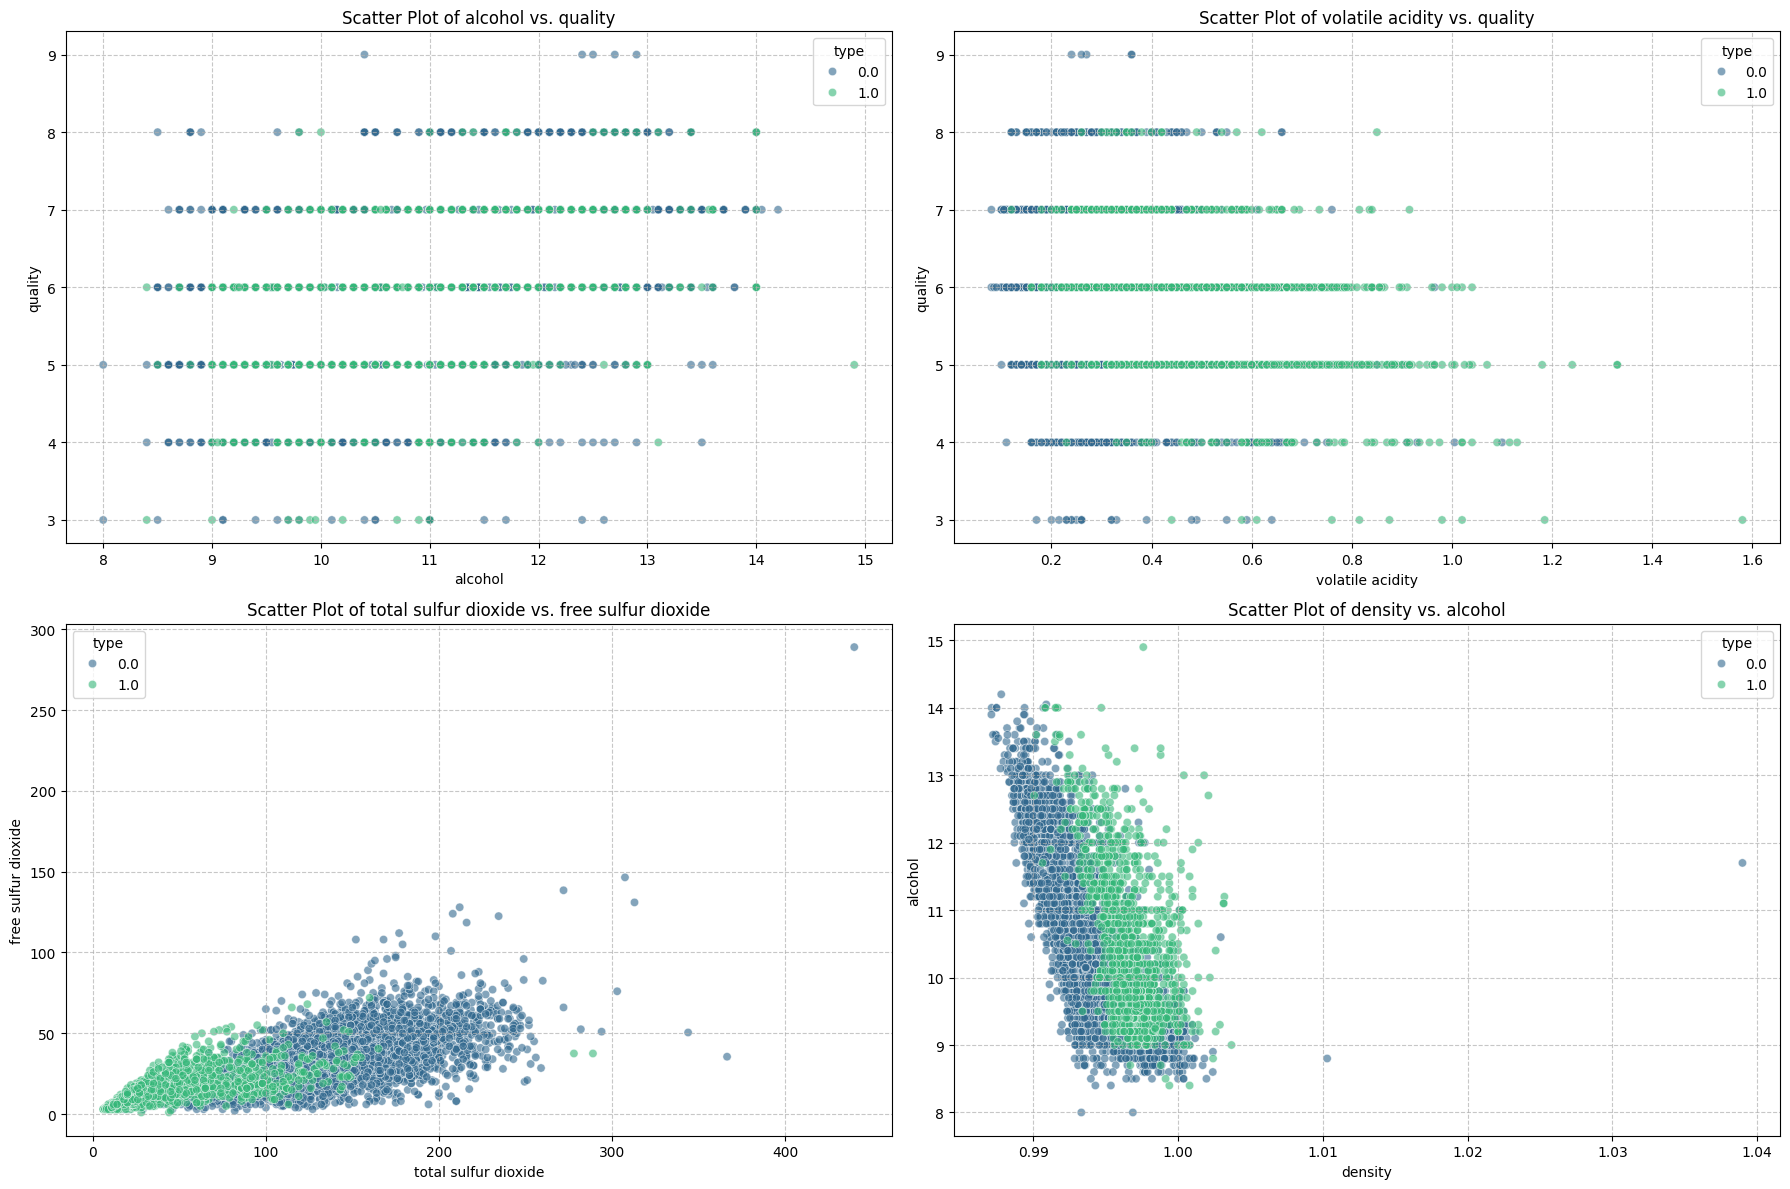

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select feature pairs for visualization based on correlation heatmap
# 1. Alcohol vs. Quality (strong positive correlation)
# 2. Volatile Acidity vs. Quality (strong negative correlation)
# 3. Total Sulfur Dioxide vs. Free Sulfur Dioxide (high correlation among themselves)
# 4. Density vs. Alcohol (strong negative correlation)

selected_feature_pairs = [
    ('alcohol', 'quality'),
    ('volatile acidity', 'quality'),
    ('total sulfur dioxide', 'free sulfur dioxide'),
    ('density', 'alcohol')
]

plt.figure(figsize=(18, 12))
for i, (feature1, feature2) in enumerate(selected_feature_pairs):
    plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns
    sns.scatterplot(x=df[feature1], y=df[feature2], hue=df['type'], palette='viridis', alpha=0.6)
    plt.title(f'Scatter Plot of {feature1} vs. {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [56]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# --- Collect Accuracy Scores ---

# Logistic Regression Accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)

# K-Nearest Neighbors Accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Decision Tree Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Random Forest Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Support Vector Machine Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Create a DataFrame for easy comparison
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machine'],
    'Accuracy': [lr_accuracy, knn_accuracy, dt_accuracy, rf_accuracy, svm_accuracy]
})

print("\n--- Model Accuracy Scores ---")
display(accuracy_df.sort_values(by='Accuracy', ascending=False))

# --- Print Classification Reports ---

print("\n--- Logistic Regression Classification Report ---")
print(classification_report(y_test, y_pred_lr))

print("\n--- K-Nearest Neighbors Classification Report ---")
print(classification_report(y_test, y_pred_knn))

print("\n--- Decision Tree Classifier Classification Report ---")
print(classification_report(y_test, y_pred_dt))

print("\n--- Random Forest Classifier Classification Report ---")
print(classification_report(y_test, y_pred_rf))

print("\n--- Support Vector Machine Classification Report ---")
print(classification_report(y_test, y_pred_svm))


--- Model Accuracy Scores ---


,Model,Accuracy
0,Logistic Regression,0.571295
3,Random Forest,0.569418
4,Support Vector Machine,0.551595
1,K-Nearest Neighbors,0.524390
2,Decision Tree,0.454972



--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         8
         4.0       0.50      0.02      0.04        45
         5.0       0.64      0.62      0.63       359
         6.0       0.54      0.74      0.62       455
         7.0       0.55      0.29      0.38       175
         8.0       0.00      0.00      0.00        23
         9.0       0.00      0.00      0.00         1

    accuracy                           0.57      1066
   macro avg       0.32      0.24      0.24      1066
weighted avg       0.56      0.57      0.54      1066


--- K-Nearest Neighbors Classification Report ---
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         8
         4.0       0.39      0.16      0.22        45
         5.0       0.56      0.62      0.59       359
         6.0       0.53      0.60      0.56       455
         7.0       0.42      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m